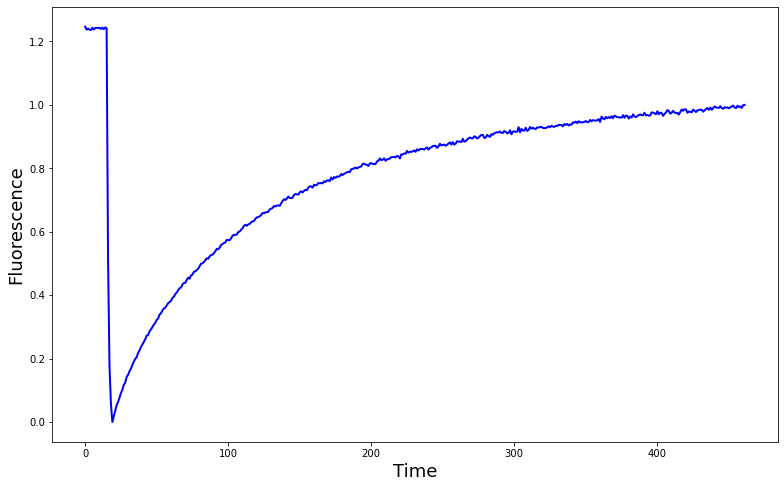

In [55]:
import numpy as np
import math
import tifffile
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


FinalData=np.arange(463)
testmat = np.arange(256*256).reshape((256,256))

for m in range(256):
    for n in range(256):
        r=math.sqrt(((130-m)**2)+((125-n)**2))

        if r>72:
            testmat[m][n]=0
        else:
            testmat[m][n]=1


for i in range(1,463):
    if i<10:
         temp3D=tifffile.imread('C:/Users/ikumi/Desktop/FRAP測定結果/201204 FRAP測定/data5min.tif.frames/data5min_C001T00'+str(i)+'.tif')
    elif i<100:
         temp3D=tifffile.imread('C:/Users/ikumi/Desktop/FRAP測定結果/201204 FRAP測定/data5min.tif.frames/data5min_C001T0'+str(i)+'.tif')
    else:
         temp3D=tifffile.imread('C:/Users/ikumi/Desktop/FRAP測定結果/201204 FRAP測定/data5min.tif.frames/data5min_C001T'+str(i)+'.tif')
            


    temp = np.arange(256*256).reshape((256,256))       
    temp=temp3D[:,:,0]
    temp2=temp
    temp2=temp*testmat
    Totalint=temp2.sum()
    temp3=temp
    temp3[10:246,10:246]=0
    Background=temp3.sum()
    
    if i==1:
        ref=Background
    
    FinalData[i]=Totalint*ref/Background


FinalData=FinalData[1:]   

#蛍光回復後の蛍光強度を規格化
FinalData1=FinalData-min(FinalData) 
FinalData2=FinalData1/(max(FinalData1[60:463]))

#初めの蛍光強度を規格化
#FinalData1=FinalData-min(FinalData) 
#FinalData2=FinalData1/max(FinalData1) 
 

plt.figure(figsize=(13, 8))
plt.plot(FinalData2,  color = "blue",linewidth=2)
#plt.plot(FinalData,marker="o",markersize=2,  color = "blue",linewidth=2)
plt.ylabel('Fluorescence',fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.show()

    



In [43]:
print(len(FinalData))

463


In [49]:
min(FinalData)

415652

In [50]:
max(FinalData[60:463])

2025426